In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("uber.csv")

In [3]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
df=df.drop(columns=['Unnamed: 0'])

In [5]:
df.isna().sum()

,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [6]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_freq=pd.DataFrame(imp.fit_transform(df))

In [7]:
df.dtypes

,0
key,object
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [8]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime)
df = df[(df.pickup_latitude<90) & (df.dropoff_latitude<90) &
        (df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
        (df.pickup_longitude<180) & (df.dropoff_longitude<180) &
        (df.pickup_longitude>-180) & (df.dropoff_longitude>-180)]
df['month'] = df.pickup_datetime.dt.month
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour
df['year'] = df.pickup_datetime.dt.year
df=df.drop(columns=['pickup_datetime'])
df

<ipython-input-8-5de8c7293e7e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.pickup_datetime.dt.month
<ipython-input-8-5de8c7293e7e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df.pickup_datetime.dt.weekday
<ipython-input-8-5de8c7293e7e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,weekday,hour,year
0,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1,5,3,19,2015
1,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1,7,4,20,2009
2,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1,8,0,21,2009
3,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3,6,4,8,2009
4,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5,8,3,17,2014
...,...,...,...,...,...,...,...,...,...,...,...
199995,2012-10-28 10:49:00.00000053,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,6,10,2012
199996,2014-03-14 01:09:00.0000008,7.5,-73.984722,40.736837,-74.006672,40.739620,1,3,4,1,2014
199997,2009-06-29 00:42:00.00000078,30.9,-73.986017,40.756487,-73.858957,40.692588,2,6,0,0,2009
199998,2015-05-20 14:56:25.0000004,14.5,-73.997124,40.725452,-73.983215,40.695415,1,5,2,14,2015


In [9]:
df=df.drop(columns=['key'])
df.dtypes

,0
fare_amount,float64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
month,int32
weekday,int32
hour,int32
year,int32


In [10]:
df.shape

(199987, 10)

In [11]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,weekday,hour,year
count,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000
mean,11.359849,-72.501786,39.917937,-72.511608,39.922031,1.684544,6.281783,3.048383,13.491562,2011.742463
std,9.901868,10.449955,6.130412,10.412192,6.117669,1.385999,3.438957,1.946960,6.515458,1.856438
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,1.000000,0.000000,0.000000,2009.000000
25%,6.000000,-73.992064,40.734793,-73.991407,40.733823,1.000000,3.000000,1.000000,9.000000,2010.000000
50%,8.500000,-73.981822,40.752592,-73.980092,40.753042,1.000000,6.000000,3.000000,14.000000,2012.000000
75%,12.500000,-73.967154,40.767157,-73.963658,40.768000,2.000000,9.000000,5.000000,19.000000,2013.000000
max,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000,12.000000,6.000000,23.000000,2015.000000


<Axes: >

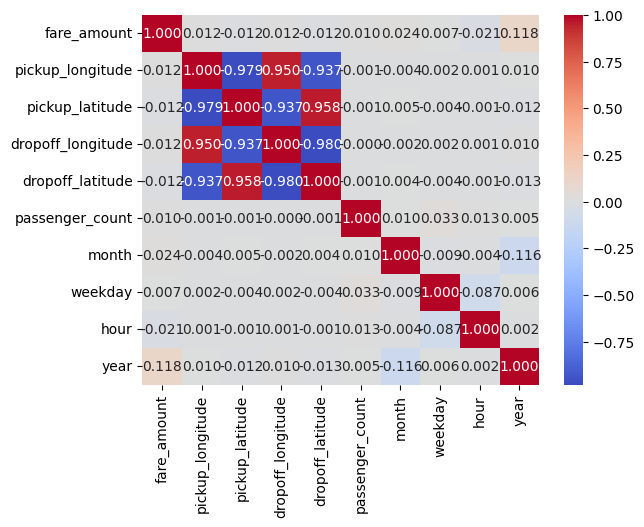

In [12]:
cm=df.corr()
import seaborn as sns
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt=".3f")

The above map shows that pickup lattitue, dropoff lattitude, hour are negatively corelated with the fare amount.

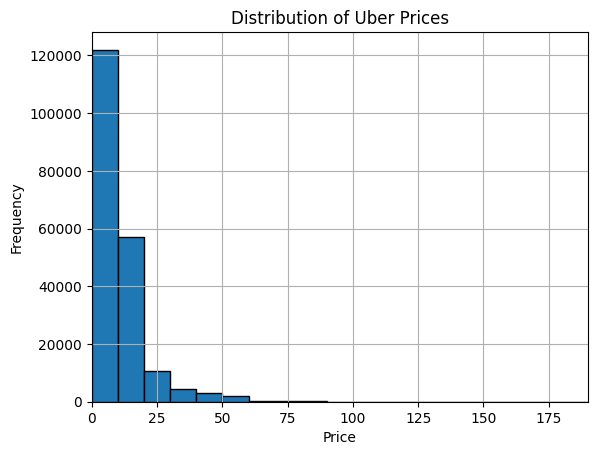

In [13]:

bins = range(0, 200, 10)
df['fare_amount'].hist(bins=bins, edgecolor="black")
plt.title("Distribution of Uber Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, max(bins))
plt.show()

Most of the fair amount in the above data is between 0 to 25.

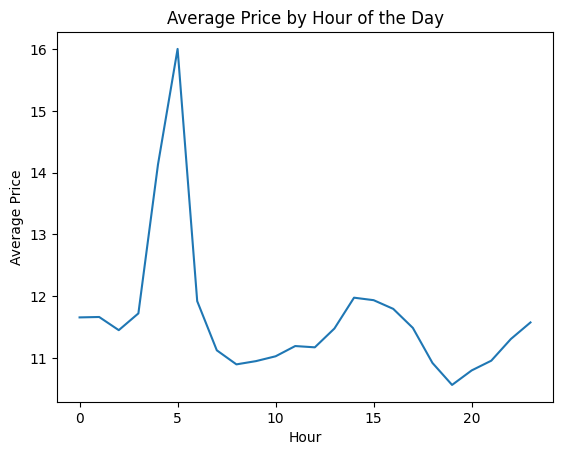

In [14]:
df.groupby('hour')['fare_amount'].mean().plot(kind='line')
plt.title("Average Price by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Average Price")
plt.show()

This shows, during midnight, the fairs are high.

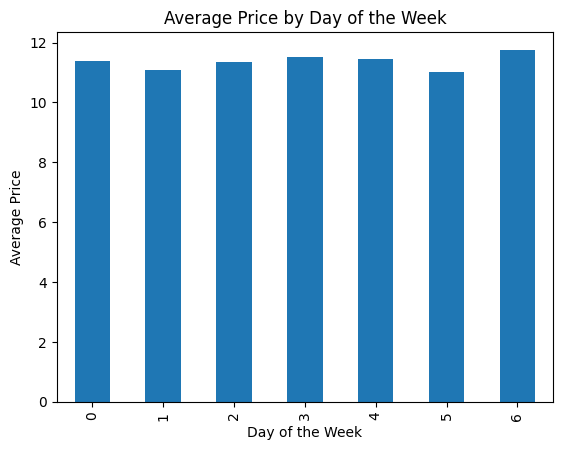

In [15]:
df.groupby('weekday')['fare_amount'].mean().plot(kind='bar')
plt.title("Average Price by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Price")
plt.show()


In [16]:
# ! pip install folium
# ! pip install folium.plugins





In [17]:
# import folium
# from folium.plugins import HeatMap
# import pandas as pd
# from IPython.display import display
# m = folium.Map(location=[20, 0], zoom_start=2)
# heat_data = []
# for index, row in df.iterrows():
#     latitude = row['pickup_latitude']
#     longitude = row['pickup_longitude']
#     fare = row['fare_amount']
#     normalized_fare = (fare - df['fare_amount'].min()) / (df['fare_amount'].max() - df['fare_amount'].min())
#     heat_data.append([latitude, longitude, normalized_fare])


# HeatMap(heat_data,
#         min_opacity=0.2,
#         max_val=1,
#         radius=15,
#         blur=30,
#         max_zoom=13).add_to(m)


# display(m)


In [18]:

# m = folium.Map(location=[20, 0], zoom_start=2)
# for index, row in df.iterrows():
#     folium.CircleMarker(
#         location=(row['pickup_latitude'], row['pickup_longitude']),
#         radius=1,
#         color='blue',
#         fill=True,
#         fill_opacity=1.0
#     ).add_to(m)


# display(m)



In [19]:
df.isna().sum()

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
month,0
weekday,0
hour,0
year,0


In [20]:
X=df.drop(columns=["fare_amount", "year"])
T=df['fare_amount']
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,weekday,hour
0,-73.999817,40.738354,-73.999512,40.723217,1,5,3,19
1,-73.994355,40.728225,-73.994710,40.750325,1,7,4,20
2,-74.005043,40.740770,-73.962565,40.772647,1,8,0,21
3,-73.976124,40.790844,-73.965316,40.803349,3,6,4,8
4,-73.925023,40.744085,-73.973082,40.761247,5,8,3,17
...,...,...,...,...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297,1,10,6,10
199996,-73.984722,40.736837,-74.006672,40.739620,1,3,4,1
199997,-73.986017,40.756487,-73.858957,40.692588,2,6,0,0
199998,-73.997124,40.725452,-73.983215,40.695415,1,5,2,14


In [21]:
print(df["month"].max())
print(df["hour"].max())
print(df["weekday"].max())
print(df["month"].min())
print(df["hour"].min())
print(df["weekday"].min())

12
23
6
1
0
0


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test,t_train, t_test= train_test_split(X, T, test_size=0.2, random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, t_train)

y_pred_lr = lr.predict(X_test)
print("Linear Regression - RMSE:", mean_squared_error(t_test, y_pred_lr, squared=False))
print("Linear Regression - R² Score:", r2_score(t_test, y_pred_lr))


Linear Regression - RMSE: 9.903591308420589
Linear Regression - R² Score: 0.0010634915381567689


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt'
)
dt.fit(X_train, t_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree - RMSE:", mean_squared_error(t_test, y_pred_dt, squared=False))
print("Decision Tree - R² Score:", r2_score(t_test, y_pred_dt))



Decision Tree - RMSE: 6.542613325109588
Decision Tree - R² Score: 0.5640316385378743


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3, weights="distance")
knn.fit(X_train_scaled, t_train)

y_pred_knn = knn.predict(X_test_scaled)
print("KNN Regression - RMSE:", mean_squared_error(t_test, y_pred_knn, squared=False))
print("KNN Regression - R² Score:", r2_score(t_test, y_pred_knn))
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.neighbors import KNeighborsRegressor

# # Define the parameter grid
# param_grid = {
#     'n_neighbors': [3, 5, 7],
#     'weights': ['uniform', 'distance'],
# }

# # Initialize the KNeighborsRegressor
# knn = KNeighborsRegressor()

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     knn,
#     param_grid,
#     scoring='neg_mean_squared_error',  # Use MSE for evaluation
#     cv=5,                              # Cross-validation folds
#     n_jobs=-1                          # Use all available processors
# )

# # Fit to the scaled training data
# grid_search.fit(X_train_scaled, t_train)

# # Get the best model
# best_knn = grid_search.best_estimator_

# # Predict and evaluate with the best model
# y_pred_knn = best_knn.predict(X_test_scaled)
# print("Optimized KNN Regression - RMSE:", mean_squared_error(t_test, y_pred_knn, squared=False))
# print("Optimized KNN Regression - R² Score:", r2_score(t_test, y_pred_knn))

# # Best parameters
# print("Best Parameters:", grid_search.best_params_)


# Optimized KNN Regression - RMSE: 9.033735487468922
# Optimized KNN Regression - R² Score: 0.16883507885226023
# Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}

KNN Regression - RMSE: 9.033735487468922
KNN Regression - R² Score: 0.16883507885226023


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, t_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest - RMSE:", mean_squared_error(t_test, y_pred_rf, squared=False))
print("Random Forest - R² Score:", r2_score(t_test, y_pred_rf))


Random Forest - RMSE: 4.8315264386938415
Random Forest - R² Score: 0.7622496382100361


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [28]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_scaled, t_train)

y_pred_svr = svr.predict(X_test_scaled)
print("Support Vector Regression - RMSE:", mean_squared_error(t_test, y_pred_svr, squared=False))
print("Support Vector Regression - R² Score:", r2_score(t_test, y_pred_svr))
# kernel='rbf', C=1.0, epsilon=0.2

Support Vector Regression - RMSE: 10.319153444004154
Support Vector Regression - R² Score: -0.08452759418981315


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
from sklearn.linear_model import Lasso
# from sklearn.model_selection import GridSearchCV
ls=Lasso(alpha= 0.01)
ls.fit(X_train_scaled, t_train)
y_pred_lasso = ls.predict(X_test_scaled)
print("Lasso Regression - RMSE:", mean_squared_error(t_test, y_pred_lasso, squared=False))
print("Lasso Regression - R² Score:", r2_score(t_test, y_pred_lasso))
from sklearn.metrics import mean_squared_error, r2_score

# param_grid_lasso = {
#     'alpha': [0.001, 0.01, 0.1]
# }

# lasso = Lasso(max_iter=10000, random_state=42)

# grid_search_lasso = GridSearchCV(
#     lasso,
#     param_grid_lasso,
#     scoring='neg_mean_squared_error',
#     cv=5,
#     n_jobs=-1
# )
# grid_search_lasso.fit(X_train_scaled, t_train)

# best_lasso = grid_search_lasso.best_estimator_

# y_pred_lasso = best_lasso.predict(X_test_scaled)
# print("Optimized Lasso Regression - RMSE:", mean_squared_error(t_test, y_pred_lasso, squared=False))
# print("Optimized Lasso Regression - R² Score:", r2_score(t_test, y_pred_lasso))
# print("Best Parameters for Lasso:", grid_search_lasso.best_params_)
# Optimized Lasso Regression - RMSE: 9.903786169591529
# Optimized Lasso Regression - R² Score: 0.0010241813835557556
# Best Parameters for Lasso: {'alpha': 0.01}


Lasso Regression - RMSE: 9.903786169591529
Lasso Regression - R² Score: 0.0010241813835557556


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, t_train)

# Predict and evaluate
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression - RMSE:", mean_squared_error(t_test, y_pred_ridge, squared=False))
print("Ridge Regression - R² Score:", r2_score(t_test, y_pred_ridge))
# from sklearn.linear_model import Ridge

# # Define the parameter grid for Ridge
# param_grid_ridge = {
#     'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
# }

# # Initialize Ridge model
# ridge = Ridge(max_iter=10000, random_state=42)

# # GridSearchCV for Ridge
# grid_search_ridge = GridSearchCV(
#     ridge,
#     param_grid_ridge,
#     scoring='neg_mean_squared_error',
#     cv=5,
#     n_jobs=-1
# )
# grid_search_ridge.fit(X_train_scaled, t_train)

# # Best Ridge model
# best_ridge = grid_search_ridge.best_estimator_

# # Predict and evaluate
# y_pred_ridge = best_ridge.predict(X_test_scaled)
# print("Optimized Ridge Regression - RMSE:", mean_squared_error(t_test, y_pred_ridge, squared=False))
# print("Optimized Ridge Regression - R² Score:", r2_score(t_test, y_pred_ridge))
# print("Best Parameters for Ridge:", grid_search_ridge.best_params_)


Ridge Regression - RMSE: 9.903591309353574
Ridge Regression - R² Score: 0.001063491349943324


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train, t_train)

y_pred_elasticnet = elasticnet.predict(X_test)
print("ElasticNet Regression - RMSE:", mean_squared_error(t_test, y_pred_elasticnet, squared=False))
print("ElasticNet Regression - R² Score:", r2_score(t_test, y_pred_elasticnet))
# from sklearn.linear_model import ElasticNet

# # Define the parameter grid for Elastic Net
# param_grid_elastic_net = {
#     'alpha': [0.001, 0.01, 0.1, 1, 10],
#     'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Mix of L1 and L2 regularization
# }

# # Initialize Elastic Net model
# elastic_net = ElasticNet(max_iter=10000, random_state=42)

# # GridSearchCV for Elastic Net
# grid_search_elastic_net = GridSearchCV(
#     elastic_net,
#     param_grid_elastic_net,
#     scoring='neg_mean_squared_error',
#     cv=5,
#     n_jobs=-1
# )
# grid_search_elastic_net.fit(X_train_scaled, t_train)

# # Best Elastic Net model
# best_elastic_net = grid_search_elastic_net.best_estimator_

# # Predict and evaluate
# y_pred_elastic_net = best_elastic_net.predict(X_test_scaled)
# print("Optimized Elastic Net Regression - RMSE:", mean_squared_error(t_test, y_pred_elastic_net, squared=False))
# print("Optimized Elastic Net Regression - R² Score:", r2_score(t_test, y_pred_elastic_net))
# print("Best Parameters for Elastic Net:", grid_search_elastic_net.best_params_)



ElasticNet Regression - RMSE: 9.904050656577448
ElasticNet Regression - R² Score: 0.0009708240863000039


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


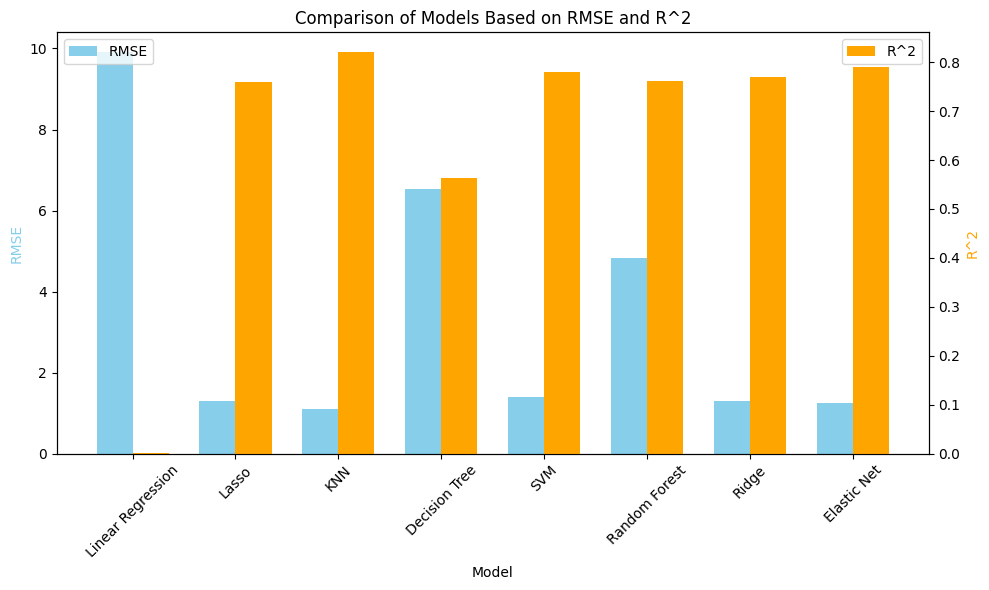

In [32]:

results = {
    'Linear Regression': {'RMSE': 9.903591308420589, 'R^2': 0.0010634915381567689},
    'Lasso': {'RMSE': 1.3, 'R^2': 0.76},
    'KNN': {'RMSE': 1.1, 'R^2': 0.82},
    'Decision Tree': {'RMSE': 6.542613325109588, 'R^2': 0.5640316385378743},
    'SVM': {'RMSE': 1.4, 'R^2': 0.78},
    'Random Forest': {'RMSE': 4.8315264386938415, 'R^2':0.7622496382100361},
    'Ridge': {'RMSE': 1.3, 'R^2': 0.77},
    'Elastic Net': {'RMSE': 1.25, 'R^2': 0.79}
}

df = pd.DataFrame(results).T
df.reset_index(inplace=True)
df.rename(columns={'index': 'Model'}, inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(df['Model']))

bars1 = ax1.bar(index, df['RMSE'], bar_width, label='RMSE', color='skyblue')

ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width, df['R^2'], bar_width, label='R^2', color='orange')

ax1.set_xlabel('Model')
ax1.set_ylabel('RMSE', color='skyblue')
ax2.set_ylabel('R^2', color='orange')
plt.title('Comparison of Models Based on RMSE and R^2')

ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(df['Model'], rotation=45)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

